In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [7]:
df = pd.read_csv('euro2024_players.csv')
df.sample(10)

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
175,Nedim Bajrami,Attacking Midfield,25,US Sassuolo,179,right,23,4,4500000,Albania
73,Krisztofer Horváth,Attacking Midfield,22,Kecskeméti TE,185,right,2,0,1200000,Hungary
587,Vitinha,Central Midfield,24,Paris Saint-Germain,172,right,16,0,50000000,Portugal
135,Marin Pongracic,Centre-Back,26,US Lecce,193,right,7,0,7000000,Croatia
87,Silvan Widmer,Right-Back,31,1.FSV Mainz 05,183,right,42,3,3000000,Switzerland
494,Andriy Lunin,Goalkeeper,25,Real Madrid,191,right,11,0,25000000,Ukraine
477,Vasile Mogoș,Right-Back,31,CFR Cluj,186,right,7,0,900000,Romania
137,Domagoj Vida,Centre-Back,35,AEK Athens,184,right,105,4,1200000,Croatia
214,Zan Zaletel,Centre-Back,24,Viborg FF,185,right,2,0,1200000,Slovenia
606,David Jurásek,Left-Back,23,TSG 1899 Hoffenheim,183,left,7,0,8000000,Czech Republic


In [8]:
df.head(10)

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany
3,Nico Schlotterbeck,Centre-Back,24,Borussia Dortmund,191,left,12,0,40000000,Germany
4,Jonathan Tah,Centre-Back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany
5,Antonio Rüdiger,Centre-Back,31,Real Madrid,190,right,69,3,25000000,Germany
6,Waldemar Anton,Centre-Back,27,VfB Stuttgart,189,right,2,0,20000000,Germany
7,Robin Koch,Centre-Back,27,Eintracht Frankfurt,191,right,9,0,18000000,Germany
8,David Raum,Left-Back,26,RB Leipzig,180,left,21,0,20000000,Germany
9,Maximilian Mittelstädt,Left-Back,27,VfB Stuttgart,180,left,4,1,17000000,Germany


In [9]:
portugal_data = df[df['Country'] == "Portugal"]
print(portugal_data)

                    Name            Position  Age                     Club  \
571          Diogo Costa          Goalkeeper   24                 FC Porto   
572              José Sá          Goalkeeper   31  Wolverhampton Wanderers   
573         Rui Patrício          Goalkeeper   36                  AS Roma   
574           Rúben Dias         Centre-Back   27          Manchester City   
575       Gonçalo Inácio         Centre-Back   22              Sporting CP   
576        António Silva         Centre-Back   20               SL Benfica   
577                 Pepe         Centre-Back   41                 FC Porto   
578          Nuno Mendes           Left-Back   21      Paris Saint-Germain   
579          Diogo Dalot          Right-Back   25        Manchester United   
580         João Cancelo          Right-Back   30             FC Barcelona   
581        Nélson Semedo          Right-Back   30  Wolverhampton Wanderers   
582        João Palhinha  Defensive Midfield   28               

Text(0.5, 1.0, 'Number of Players per Position')

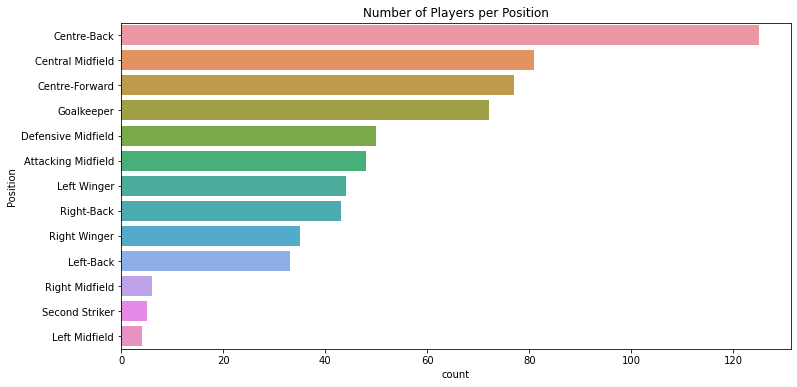

In [10]:
# Bar chart - Players per position
plt.figure(figsize=(12,6))
sns.countplot(y='Position', data=df, order=df['Position'].value_counts().index)
plt.title('Number of Players per Position')

In [11]:
most_goals = df['Goals'].idxmax()
player_most_goals = df.loc[most_goals]

print("Player with the most goals:")
print(player_most_goals)

Player with the most goals:
Name           Cristiano Ronaldo
Position          Centre-Forward
Age                           39
Club                 Al-Nassr FC
Height                       188
Foot                       right
Caps                         206
Goals                        128
MarketValue             15000000
Country                 Portugal
Name: 596, dtype: object


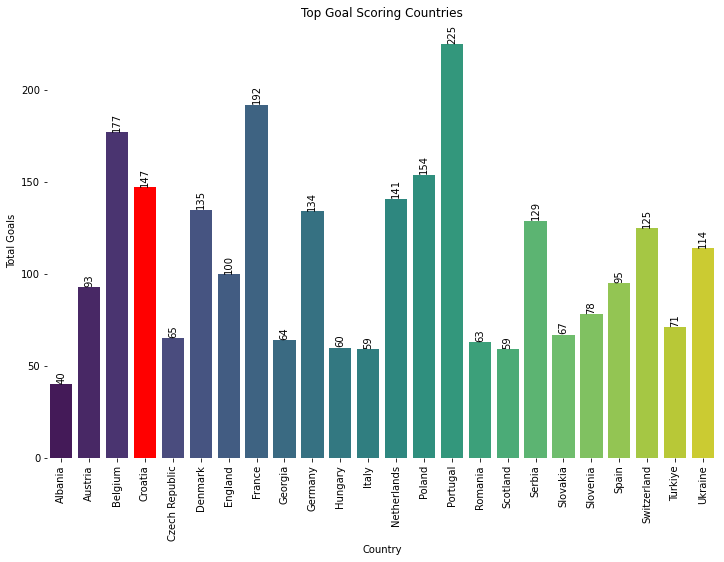

In [12]:
# Summarize goals and caps by country
summary_by_country = df.groupby('Country').agg({'Goals': 'sum', 'Caps': 'sum'}).reset_index()

# Find the country with the maximum Caps
top_caps_country = summary_by_country.loc[summary_by_country['Caps'].idxmax()]

# # Plotting the bar chart vertically
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Country', y='Goals', data=summary_by_country, palette='viridis')

# Displaying the values on each bar
for i, (country, value) in enumerate(zip(summary_by_country['Country'], summary_by_country['Goals'])):
    bar_plot.text(i, value + 0.2, f'{value}', ha='center', va='bottom', fontsize=10, color='black', rotation=90)

# Highlighting the country with the most Caps
for i in range(len(summary_by_country)):
    if summary_by_country.iloc[i]['Country'] == top_caps_country['Country']:
        bar_plot.patches[i].set_facecolor('red')

# Adding title and labels
plt.title('Top Goal Scoring Countries')
plt.xlabel('Country')
plt.ylabel('Total Goals')
plt.xticks(rotation=90)

# Removing unnecessary spines
sns.despine(left=True, bottom=True)

# Displaying the plot
plt.show()

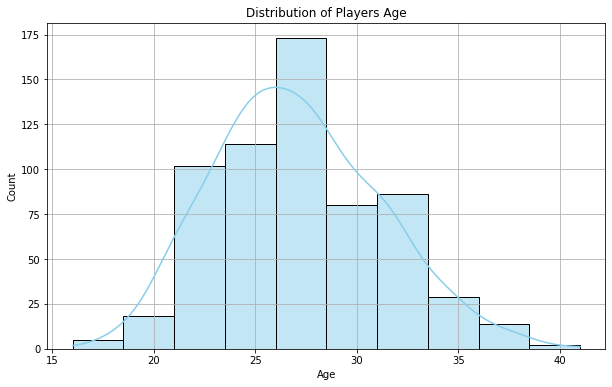

In [13]:
# Players by age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Players Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()

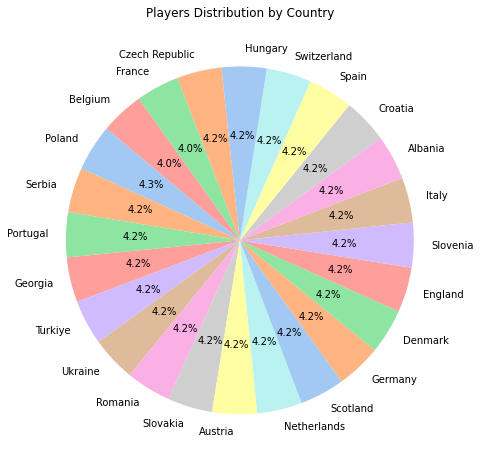

In [14]:
# Pie chart: Players by country
plt.figure(figsize=(8, 8))
country_counts = df['Country'].value_counts()
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Players Distribution by Country')
plt.show()

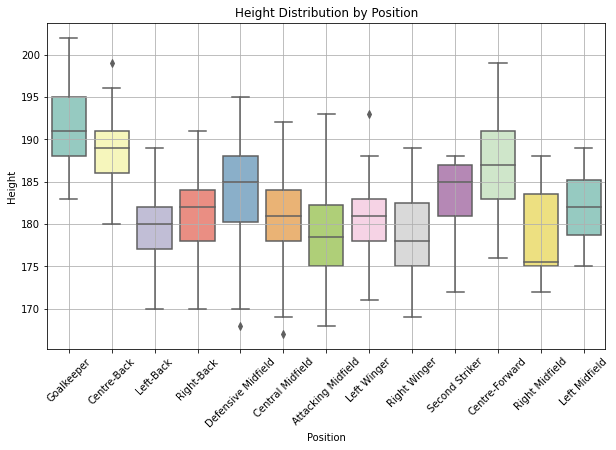

In [15]:
# Box plot:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Position', y='Height', data=df, palette='Set3')
plt.title('Height Distribution by Position')
plt.xlabel('Position')
plt.ylabel('Height')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

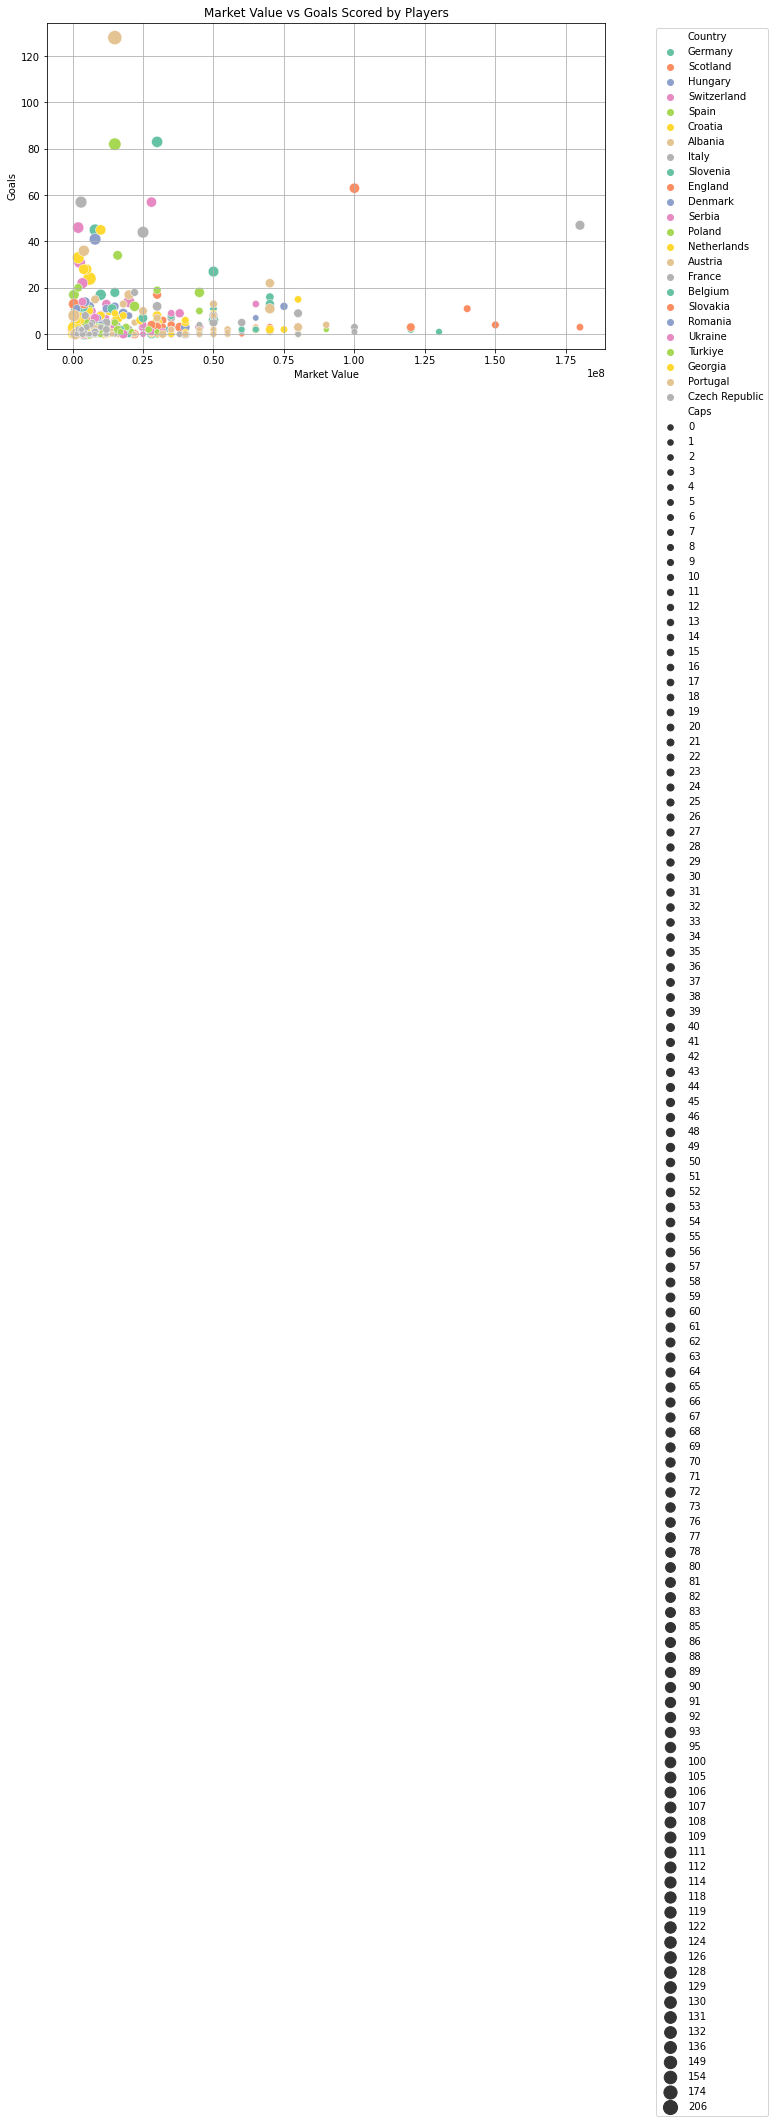

In [16]:
# Scatter plot:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MarketValue', y='Goals', data=df, hue='Country', size='Caps', sizes=(30, 200), palette='Set2', legend='full')
plt.title('Market Value vs Goals Scored by Players')
plt.xlabel('Market Value')
plt.ylabel('Goals')
plt.grid(True)
plt.legend( loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

Average Caps for German Goalkeepers: 22.083333333333332


<AxesSubplot:ylabel='Frequency'>

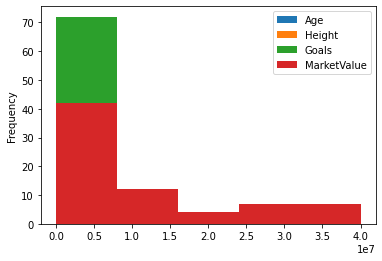

In [17]:
# Filter by Goalkeepers
goalkeepers = df[df["Position"] == "Goalkeeper"]

# Analyze experience (number of caps)
average_caps = goalkeepers["Caps"].mean()
print(f"Average Caps for German Goalkeepers: {average_caps}")

# Visualize experience using histograms
goalkeepers.plot.hist(bins=5, x="Caps")